In [6]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [7]:
dataset = "C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis project/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint.csv"

model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [8]:
NUM_CLASSES = 24

# Dataset reading

In [9]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [10]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [12]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

model =  tf.keras.models.Sequential([
     tf.keras.layers.Input((21 * 2, )),
    
    # First dense layer with batch normalization and dropout
     tf.keras.layers.Dense(100, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Second dense layer with batch normalization and dropout
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Third dense layer with batch normalization and dropout
     tf.keras.layers.Dense(20, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Output layer
     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4300      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                       

In [14]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [15]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


37/43 [========================>.....] - ETA: 0s - loss: 3.1357 - accuracy: 0.0830
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 6s 25ms/step - loss: 3.0972 - accuracy: 0.0952 - val_loss: 3.1137 - val_accuracy: 0.0899
Epoch 2/1000
17/43 [==========>...................] - ETA: 0s - loss: 2.7703 - accuracy: 0.1893

C:\Users\metua\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/43 [========================>.....] - ETA: 0s - loss: 2.6927 - accuracy: 0.2181
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 11ms/step - loss: 2.6662 - accuracy: 0.2325 - val_loss: 3.0392 - val_accuracy: 0.2126
Epoch 3/1000
38/43 [=========================>....] - ETA: 0s - loss: 2.3508 - accuracy: 0.3337
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 10ms/step - loss: 2.3366 - accuracy: 0.3399 - val_loss: 2.9122 - val_accuracy: 0.3321
Epoch 4/1000
41/43 [===========================>..] - ETA: 0s - loss: 2.0626 - accuracy: 0.4217
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 9ms/step - loss: 2.0591 - accuracy: 0.4216 - val_loss: 2.7685 - val_accuracy: 0.2855
Epoch 5/1000
42/43 [============================>.] - ETA: 0s - loss: 1.7920 - accuracy: 0.4940
Epoch 5: sav

In [17]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 [==============================] - 0s 4ms/step - loss: 0.3974 - accuracy: 0.8619


In [18]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [19]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 318ms/step
[3.3504504e-04 1.2183966e-05 1.0788570e-05 2.6081218e-06 1.3160030e-07
 3.9735762e-04 9.7387488e-07 4.6120340e-06 8.7949513e-03 6.6413006e-05
 4.8382083e-04 4.0414002e-07 4.6430704e-01 3.9000741e-05 3.9896707e-04
 1.0313780e-06 5.3254543e-03 2.8765498e-04 5.5490142e-05 1.6314752e-04
 5.1085126e-01 1.7372484e-05 1.5108137e-05 8.4292470e-03]
20


# Confusion matrix

58/58 [==============================] - 0s 3ms/step


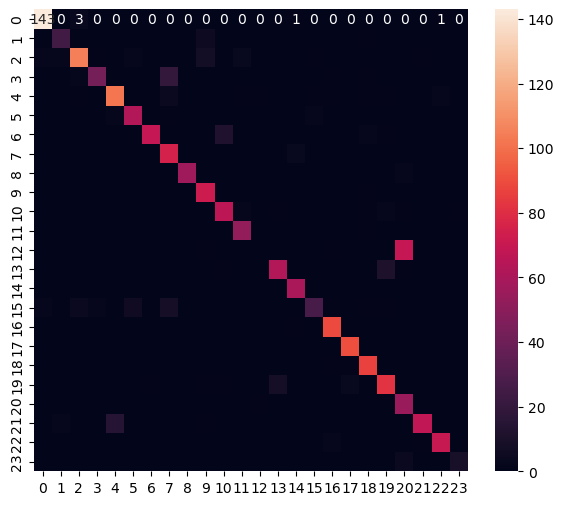

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       148
           1       0.86      0.81      0.83        31
           2       0.91      0.85      0.88       124
           3       0.93      0.65      0.77        66
           4       0.86      0.89      0.88       115
           5       0.89      0.93      0.91        68
           6       0.99      0.82      0.90        84
           7       0.70      0.96      0.81        78
           8       1.00      0.97      0.98        58
           9       0.83      0.99      0.90        73
          10       0.83      0.89      0.86        75
          11       0.90      0.98      0.94        54
          12       0.00      0.00      0.00        71
          13       0.88      0.83      0.85        76
          14       0.92      1.00      0.96        60
          15       0.87      0.52      0.65        52
          16       0.93      0.99      0.96        90
     

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [21]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\metua\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\metua\AppData\Local\Temp\tmpqw74qt5e\assets


INFO:tensorflow:Assets written to: C:\Users\metua\AppData\Local\Temp\tmpqw74qt5e\assets


18976

# Inference test

In [23]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [24]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [26]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [27]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.88490157e-04 2.43501872e-05 2.28082517e-05 4.76266587e-06
 3.03970666e-07 6.81421661e-04 1.83430382e-06 9.24101096e-06
 1.03000337e-02 1.45809929e-04 6.83840481e-04 9.02415877e-07
 4.65038359e-01 5.66572598e-05 7.72370666e-04 2.28341787e-06
 9.15917754e-03 4.13127709e-04 1.01500824e-04 2.27384371e-04
 5.01604795e-01 3.19579412e-05 2.95440914e-05 1.01990523e-02]
20
